## In this portfolio project, I took star wars survey data and clean it little bit to know which one is the people favorite and how many seen the movie 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable plotting inline.
%matplotlib inline

In [2]:
# Read in the data
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
# Show a sample of the data
pd.set_option("display.max_columns", None)
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
# Check the number of rows and columns
star_wars.shape

(1186, 38)

In [5]:
# List the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [6]:
%%html
<style>
table {float:left}
</style>

In [7]:
# First rename the columns to something readable
updated_column_names = {'Have you seen any of the 6 films in the Star Wars franchise?': 'saw_any',
                        'Do you consider yourself to be a fan of the Star Wars film franchise?': 'is_fan' }
                        
star_wars = star_wars.rename (columns = updated_column_names)

In [8]:
# Check existing values for 'saw_any' (fka 'Have you seen....') column
star_wars['saw_any'].value_counts(dropna = False)

Yes    936
No     250
Name: saw_any, dtype: int64

In [9]:
# Check existing values for 'is_fan' (fka 'Do you consider...') column
star_wars['is_fan'].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: is_fan, dtype: int64

In [10]:
# Create mapping dictionary to convert to Booleans
map_yes_no = {'Yes': True, 'No': False}

# Apply map to both columns
star_wars['saw_any'] = star_wars['saw_any'].map(map_yes_no)
star_wars['is_fan'] = star_wars['is_fan'].map(map_yes_no)

In [11]:
# Check result: new existing values for 'saw_any' column
star_wars['saw_any'].value_counts(dropna = False)

True     936
False    250
Name: saw_any, dtype: int64

In [12]:
# Check result: new existing values for 'is_fan' column
star_wars['is_fan'].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: is_fan, dtype: int64

In [13]:
# First rename the columns to something readable
updated_column_names = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                        'Unnamed: 4': 'seen_2',
                        'Unnamed: 5': 'seen_3',
                        'Unnamed: 6': 'seen_4',
                        'Unnamed: 7': 'seen_5',
                        'Unnamed: 8': 'seen_6'}
star_wars = star_wars.rename (columns = updated_column_names)

In [14]:
# Check for all 6 columns what data is in
for entry in range (1,7):
    my_column_name = 'seen_{}'.format(entry)
    print ('value_counts in', my_column_name)
    print (star_wars[my_column_name].value_counts(dropna = False))

value_counts in seen_1
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_1, dtype: int64
value_counts in seen_2
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: seen_2, dtype: int64
value_counts in seen_3
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_3, dtype: int64
value_counts in seen_4
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: seen_4, dtype: int64
value_counts in seen_5
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: seen_5, dtype: int64
value_counts in seen_6
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: seen_6, dtype: int64


In [15]:
# Before replacing the data in the columns, let's capture the precise movie names. It may come in handy later.
# Since the spelling is consistent, we can just take those from the first row in the dataframe.
# We'll put these names in a dictionary. 
# In the same loop, let's also create a mapping dictionary already.

six_movies = {}
map_movie_seen = {}
for entry in range (1,7):
    my_column_name = 'seen_{}'.format(entry)
    my_movie_name = star_wars.iloc[0, entry+2]
    six_movies[entry] = my_movie_name
    map_movie_seen[my_movie_name] = True

# For the mapping dictionary, also add an entry to replace NaN with False
map_movie_seen[np.nan] = False

In [16]:
# Show dictionary with all 6 movies
six_movies

{1: 'Star Wars: Episode I  The Phantom Menace',
 2: 'Star Wars: Episode II  Attack of the Clones',
 3: 'Star Wars: Episode III  Revenge of the Sith',
 4: 'Star Wars: Episode IV  A New Hope',
 5: 'Star Wars: Episode V The Empire Strikes Back',
 6: 'Star Wars: Episode VI Return of the Jedi'}

In [17]:
# Show mapping dictionary
map_movie_seen

{'Star Wars: Episode I  The Phantom Menace': True,
 'Star Wars: Episode II  Attack of the Clones': True,
 'Star Wars: Episode III  Revenge of the Sith': True,
 'Star Wars: Episode IV  A New Hope': True,
 'Star Wars: Episode V The Empire Strikes Back': True,
 'Star Wars: Episode VI Return of the Jedi': True,
 nan: False}

In [18]:
# Apply the mapping dictionary to the six 'seen' columns
for entry in range (1,7):
    my_column_name = 'seen_{}'.format(entry)
    star_wars[my_column_name]=star_wars[my_column_name].map(map_movie_seen)

In [19]:
# Check the result (by comparing this output with what we had  above)
for entry in range (1,7):
    my_column_name = 'seen_{}'.format(entry)
    print ('value_counts in', my_column_name)
    print (star_wars[my_column_name].value_counts(dropna = False))

value_counts in seen_1
True     673
False    513
Name: seen_1, dtype: int64
value_counts in seen_2
False    615
True     571
Name: seen_2, dtype: int64
value_counts in seen_3
False    636
True     550
Name: seen_3, dtype: int64
value_counts in seen_4
True     607
False    579
Name: seen_4, dtype: int64
value_counts in seen_5
True     758
False    428
Name: seen_5, dtype: int64
value_counts in seen_6
True     738
False    448
Name: seen_6, dtype: int64


In [20]:
# First rename the columns to something readable
updated_column_names_ranking = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
                        'Unnamed: 10': 'ranking_2',
                        'Unnamed: 11': 'ranking_3',
                        'Unnamed: 12': 'ranking_4',
                        'Unnamed: 13': 'ranking_5',
                        'Unnamed: 14': 'ranking_6'}
star_wars = star_wars.rename (columns = updated_column_names_ranking)

In [21]:
# Convert all values to floats. (Leave NaN as is.)
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [22]:
# Check for all 6 columns what data is in now: should only be 1.0, 2.0 .... 6.0 and NaN
for entry in range (1,7):
    my_column_name = 'ranking_{}'.format(entry)
    print ('value_counts in', my_column_name)
    print (star_wars[my_column_name].value_counts(dropna = False))

value_counts in ranking_1
NaN    351
4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: ranking_1, dtype: int64
value_counts in ranking_2
NaN    350
5.0    300
4.0    183
2.0    116
3.0    103
6.0    102
1.0     32
Name: ranking_2, dtype: int64
value_counts in ranking_3
NaN    351
6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: ranking_3, dtype: int64
value_counts in ranking_4
NaN    350
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     79
Name: ranking_4, dtype: int64
value_counts in ranking_5
NaN    350
1.0    289
2.0    235
5.0    118
3.0    106
4.0     47
6.0     41
Name: ranking_5, dtype: int64
value_counts in ranking_6
NaN    350
2.0    232
3.0    220
1.0    146
6.0    145
4.0     57
5.0     36
Name: ranking_6, dtype: int64


In [23]:
# Create 2 helper lists to easily select columns from the dataframe
seencolumns = []
rankingcolumns = []
for i in range (1,7):
    seencolumnname = 'seen_{}'.format(i)
    seencolumns.append(seencolumnname)
    rankingcolumnname = 'ranking_{}'.format(i)
    rankingcolumns.append(rankingcolumnname)

print (seencolumns)
print (rankingcolumns)

['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']


In [24]:
# Only keep the rows of respondents that indicated they saw at least one movie
star_wars = star_wars[star_wars['saw_any']== True]

In [25]:
# To check: there should be 936 rows left
star_wars.shape

(936, 38)

In [26]:
# Calculate the average ranking of each episode
the_rankings = star_wars[rankingcolumns].mean()

In [27]:
# List the rankings of all episodes
the_rankings

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

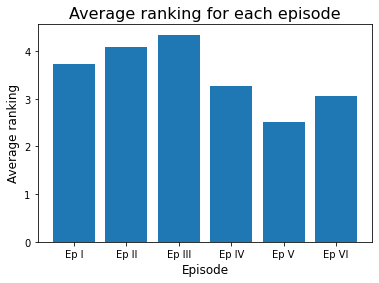

In [28]:
# Create a plot with these numbers
fig, ax = plt.subplots(figsize = (6,4))
plt.bar(('Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI'), the_rankings)
plt.title ('Average ranking for each episode', fontsize = 16)
plt.xlabel('Episode', fontsize = 12)
plt.ylabel('Average ranking', fontsize = 12)
plt.show()

In [29]:
# Show a larger sample of the 'seen' and 'ranking' columns.
star_wars[seencolumns + rankingcolumns].head(80)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0
2,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0
3,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0
4,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0
5,True,True,True,True,True,True,1.0,4.0,3.0,6.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,True,True,True,True,True,True,6.0,4.0,5.0,1.0,2.0,3.0
83,True,True,True,True,True,True,6.0,5.0,4.0,2.0,3.0,1.0
85,True,True,True,True,True,True,6.0,5.0,3.0,2.0,1.0,4.0
88,True,True,True,False,True,True,1.0,4.0,3.0,6.0,5.0,2.0


In [30]:
# Add a column to indicate how many movies were seen
star_wars['seen_how_many'] = star_wars[seencolumns].sum(axis=1)

# Create a new dataframe only containing the records where that number is 6
star_wars_sawall = star_wars[star_wars['seen_how_many'] == 6]

# Check how many records we have left
star_wars_sawall.shape

(471, 39)

In [31]:
# Show a small sample to check if we did this correctly
star_wars_sawall[seencolumns + rankingcolumns].head(10)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0
3,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0
4,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0
5,True,True,True,True,True,True,1.0,4.0,3.0,6.0,5.0,2.0
6,True,True,True,True,True,True,6.0,5.0,4.0,3.0,1.0,2.0
7,True,True,True,True,True,True,4.0,5.0,6.0,3.0,2.0,1.0
8,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0
12,True,True,True,True,True,True,3.0,4.0,5.0,6.0,1.0,2.0
13,True,True,True,True,True,True,4.0,5.0,6.0,2.0,3.0,1.0
14,True,True,True,True,True,True,4.0,2.0,5.0,3.0,1.0,6.0


In [32]:
# Calculate the average ranking of each episode (for those who saw all episodes)
the_rankings_sawall = star_wars_sawall[rankingcolumns].mean()

In [33]:
# List the rankings of all episodes (for those who saw all episodes)
the_rankings_sawall

ranking_1    4.237792
ranking_2    4.326964
ranking_3    4.253191
ranking_4    2.866242
ranking_5    2.380042
ranking_6    2.932059
dtype: float64

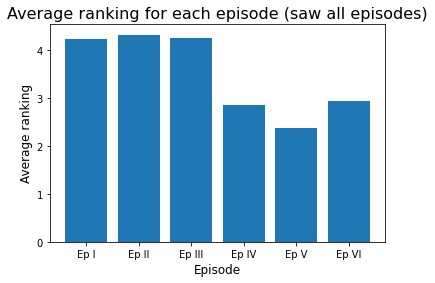

In [34]:
# Create a plot with these numbers
fig, ax = plt.subplots(figsize = (6,4))
plt.bar(('Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI'), the_rankings_sawall)
plt.title ('Average ranking for each episode (saw all episodes)', fontsize = 16)
plt.xlabel('Episode', fontsize = 12)
plt.ylabel('Average ranking', fontsize = 12)
plt.show()

In [35]:
# Calculate how much each movie was seen
how_much_seen = star_wars[seencolumns].sum()
how_much_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

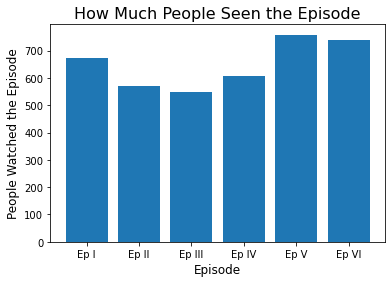

In [36]:
# Create a plot with these numbers
fig, ax = plt.subplots(figsize = (6,4))
plt.bar(('Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI'), how_much_seen)
plt.title ('How Much People Seen the Episode', fontsize = 16)
plt.xlabel('Episode', fontsize = 12)
plt.ylabel('People Watched the Episode', fontsize = 12)
plt.show()

From the data above, we could tell that the third movie is the best rating for everyone that not watch every movie and the second movie is the best rating for everyone that watch every movie. And the fifth movie is the most watched movie from star wars.